# Extract a pair of inSAR and Optical images over the same region

We will use Sentinel data from Google Earth Engine. We will get pairs of Sentinel 1 and Sentinel 2 images. We will use a region over the Mt. St. Helens in Washington State, USA.

In [228]:
%matplotlib inline

In [308]:
import numpy as np
import pandas as pd

In [230]:
# If you get an error here you probably need to authenticate:
#https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/authorize_notebook_server.ipynb
import ipyleaflet
import ee
ee.Initialize()

In [231]:
def GetTileLayerUrl(ee_image_object):
  map_id = ee.Image(ee_image_object).getMapId()
  tile_url_template = "https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}"
  return tile_url_template.format(**map_id)

In [232]:
def ReplaceOverlayLayers(map_object, ee_image_object):
    ''' Will update existing map '''
    for lyr in map_object.layers[1:]:
        map_object.remove_layer(lyr)
    tile_url = GetTileLayerUrl(ee_image_object)
    map_object.add_layer(ipyleaflet.TileLayer(url=tile_url))

In [233]:
#task = ee.batch.Export.image.toDrive(image=sample_image)

In [234]:
# path = ee_image_object.getDownloadUrl()

In [235]:
# print(path)

In [236]:
# !curl https://earthengine.googleapis.com/api/download?docid=53bcb718f4d06cda81c8eebfb49f7dca&token=c1770ff68d5ecd81837f6abdc99b1168

In [237]:
# path = ee_image_object.getDownloadUrl({
#    'scale': 30,
#    'crs': 'EPSG:4326',
#    'region': '[[-120, 35], [-119, 35], [-119, 34], [-120, 34]]'
#})
#print(path)
#!wget https://earthengine.googleapis.com/api/download?docid=e3a3d6a3b62ec5bc6b2b5b72d30fd2db&token=55bea50bb52caed55a2767fb57867894

In [238]:
#!wget https://earthengine.googleapis.com/api/download?docid=e3a3d6a3b62ec5bc6b2b5b72d30fd2db&token=55bea50bb52caed55a2767fb57867894

In [239]:
#!conda install --yes pillow

In [240]:
#!conda install --yes matplotlib

## Extract a Sentinel 2 (Optical) image

In [345]:
import ee
import numpy as np
import time
 
# init the ee object
ee.Initialize()

In [346]:
#area = ee.Geometry.Rectangle([center[0]-0.05,center[1]-0.05,center[0]+0.05, center[1]+0.05])
#area = ee.Geometry.Rectangle([-122.267909, 46.174417, -122.136753, 46.229131])

In [347]:
# Mt. St. Helens Region
area = ee.Geometry.Polygon([[-122.25143083553257,46.167741214310134],
[-122.12440141658726,46.167741214310134],
[-122.12440141658726,46.24543639647186],
[-122.25143083553257,46.24543639647186],
[-122.25143083553257,46.167741214310134]])

In [348]:
# define the image
collection = ee.ImageCollection("COPERNICUS/S2").filterBounds(area)\
                                      .filterDate("2019-08-01","2019-08-10")\
                                      .filterMetadata("CLOUDY_PIXEL_PERCENTAGE","less_than",100)\
                                      .select(['B8', 'B4'])

img = collection.max().addBands(ee.Image.pixelLonLat())
img = img.reduceRegion(reducer=ee.Reducer.toList(),\
                                        geometry=area,\
                                        maxPixels=1e16,\
                                        scale=10);

In [349]:
data = np.array(img.get('B4').getInfo())
lats = np.array((ee.Array(img.get("latitude")).getInfo()))
lons = np.array((ee.Array(img.get("longitude")).getInfo()))

In [350]:
import xarray as xr

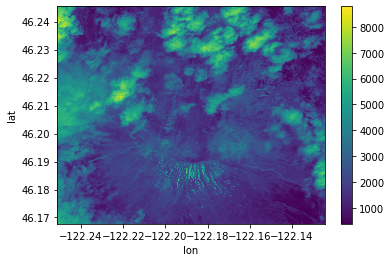

In [351]:
idx = pd.MultiIndex.from_arrays(arrays=[lats,lons], names=["lat","lon"])
s = pd.Series(data=data, index=idx)
da = xr.DataArray.from_series(s)
da.plot()

In [352]:
# export the latitude, longitude and array
def LatLonImg(img):
    img = img.addBands(ee.Image.pixelLonLat())
    img = img.reduceRegion(reducer=ee.Reducer.toList(),\
                                        geometry=area,\
                                        maxPixels=1e16,\
                                        scale=10);
 
    data = np.array((ee.Array(img.get("result")).getInfo()))
    lats = np.array((ee.Array(img.get("latitude")).getInfo()))
    lons = np.array((ee.Array(img.get("longitude")).getInfo()))
    return lats, lons, data


## Interactive Map

In [353]:
# map
image_centroid = tuple(area.centroid().getInfo()['coordinates'][::-1])

map1 = ipyleaflet.Map(zoom=13, center=image_centroid, layout=dict(height='600px',width='800px'))
dc = ipyleaflet.DrawControl()
map1.add_control(dc)


viz_dif = {'bands':'B8', 
            #'min': -4, 
            #'max': 0, 
            'opacity': 0.1,
            'palette': ['0000FF','00FFFF'],
          }

ReplaceOverlayLayers(map1, collection.first().visualize(**viz_dif))
map1.add_layer(
    ipyleaflet.TileLayer(url=GetTileLayerUrl(collection.first()))
)

map1

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

## Sentinel 1 inSAR 

In [259]:
import ee
import numpy as np
import time
 
# init the ee object
ee.Initialize()
 
# Define the roi
center = [-122.189,46.197]
area = ee.Geometry.Rectangle([-122.267909, 46.174417, -122.136753, 46.229131])

In [ ]:
import ee
import numpy as np
import time
 
# init the ee object
ee.Initialize()
 
# Define the roi

 
# define the image
collection = ee.ImageCollection("COPERNICUS/S1_GRD").filterBounds(area)\
                                      .filterDate("2018-01-01","2019-01-05")\
                                      .select(['VH', 'VV'])
 
print(" number of image: ",collection.size().getInfo())
 

In [354]:
def latlondata2xarray(lats,lons,data):
    idx = pd.MultiIndex.from_arrays(arrays=[lat,lon], names=["lat","lon"])
    s = pd.Series(data=data, index=idx)

In [335]:
#lat_len = len(np.unique(lat))
#lon_len = len(np.unique(lon))

In [337]:
img = collection.max().addBands(ee.Image.pixelLonLat())
img = img.reduceRegion(reducer=ee.Reducer.toList(),\
                                        geometry=area,\
                                        maxPixels=1e16,\
                                        scale=10);

def eeImage2xarray(img):
    data = np.array((ee.Array(img.get("result")).getInfo()))
    lats = np.array((ee.Array(img.get("latitude")).getInfo()))
    lons = np.array((ee.Array(img.get("longitude")).getInfo()))
    

In [338]:
#data = data.reshape((lat_len, lon_len))
#lat = lat.reshape((lat_len, lon_len))
#lon = lon.reshape((lat_len, lon_len))

In [340]:
data = np.array(img.get('VH').getInfo())
lats = np.array((ee.Array(img.get("latitude")).getInfo()))
lons = np.array((ee.Array(img.get("longitude")).getInfo()))

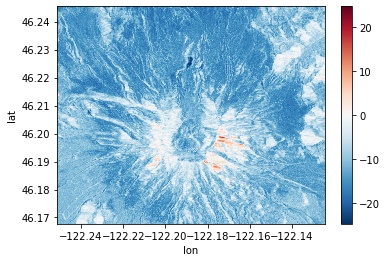

In [342]:
import pandas as pd
idx = pd.MultiIndex.from_arrays(arrays=[lats,lons], names=["lat","lon"])
s = pd.Series(data=data, index=idx)
s
# use from_series method
da = xr.DataArray.from_series(s)
da.plot()

## Interactive Map

In [343]:
image_centroid = tuple(area.centroid().getInfo()['coordinates'][::-1])

map1 = ipyleaflet.Map(zoom=13, center=image_centroid, layout=dict(height='600px',width='800px'))
dc = ipyleaflet.DrawControl()
map1.add_control(dc)
# map
viz_dif = {'bands':'VH', 
            #'min': -4, 
            #'max': 0, 
            'opacity': 0.5,
            'palette': ['0000FF','00FFFF'],
          }

#ReplaceOverlayLayers(map1, collection.first().visualize(**viz_dif))
map1.add_layer(
    ipyleaflet.TileLayer(url=GetTileLayerUrl(collection.max().visualize(**viz_dif)))
)

map1

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …